In [2]:
import pickle
import math
import numpy as np

import matplotlib
font = {'size':16}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.facecolor'] = 'white'
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib as mpl

In [3]:
class Data_Scenario3():
    def __init__(self, p=0.9, τ=30, max_t=1000):
        self.p = [[p, 1-p], [1-p, p]]
        self.τ = τ
        self.max_t = max_t

    def get_samples(self, t):
        # y0 = np.random.choice([0, 1])
        y0 = 1
        y_seq = [y0]
        # for _ in range(self.max_t-1):
        for _ in range(t + 10 - 1):
            y_seq.append(np.random.choice([0, 1], p=self.p[y_seq[-1]]))
        # y_train, y_test = y_seq[:t], y_seq[t:]
        return y_seq
        return y_train, y_test

In [4]:
class Data_Scenario4():
    def __init__(self, p=0.9, τ=30, max_t=1000):
        self.p = [[p, 1-p], [1-p, p]]
        self.τ = τ
        self.max_t = max_t
        gamma = 0.9
        self.gamma_vals = np.array([gamma**i for i in range(max_t)])

class MDP():
    def __init__(self):
        α = 0.1
        β = 0.1

        # T(a_t, s_t) = P(s_{t+1} | s_t, a_t)
        self.T = np.array([
            [[α, 1-α],
             [1-α, α]],
            [[β, 1-β],
             [1-β, β]],
        ])
        self.state = np.random.choice([0, 1])

    def step(self, action):
        y_prev = self.state
        action = int(action)

        y_next = np.random.choice([0, 1], p=self.T[action, y_prev])
        loss = np.abs(action - y_next)
        self.state = y_next

        return y_prev, loss
    
def get_data(t):
    mdp = MDP()

    Z_t = []
    A_t = []
    L_t = []
    for i in range(t):
        action = np.random.choice([0, 1])
        z_true, loss = mdp.step(action)
        Z_t.append(z_true)
        A_t.append(action)
        L_t.append(loss)
    return Z_t, A_t, L_t

In [5]:
def MC(T=20,theta=0.1,reps = 50):
    Y_reps = np.zeros((reps,T))
    for rep in range(reps):
        Y = [1]
        y_0 =  np.random.choice([0,1], size=9,p = [theta,1-theta])
        # y_0 = 0
        Y.extend(y_0)
        for t in range(10,T):
            if Y[t-1] == 0:
                y_t = np.random.choice([0,1], size=1,p = [theta,1-theta])[0]
            elif Y[t-1] == 1:
                y_t = np.random.choice([0,1], size=1,p = [1-theta,theta])[0]
            Y.append(y_t)
        Y_reps[rep,:] = Y
    return Y_reps

In [6]:
def MC_sub(T=20,T_end = 40,theta_0=0.5,theta_1=0.5,reps = 50):
    Y_reps = np.zeros((reps,T_end))
    for rep in range(reps):
        Y = np.ndarray.tolist(np.random.binomial(1, 0.5, size=(1 , T)))[0]
        theta_0t = theta_0
        theta_1t = theta_1
        for t in range(T,T_end):
            if Y[t-1] == 0:
                y_t = np.random.choice([0,1], size=1,p = [theta_0t,1-theta_0t])[0]
            elif Y[t-1] == 1:
                y_t = np.random.choice([0,1], size=1,p = [1-theta_1t,theta_1t])[0]
            Y.append(y_t)
            theta_0t = 1-np.sum(Y)/len(Y)
            theta_1t = np.sum(Y)/len(Y)
        Y_reps[rep,:] = Y
    return Y_reps[:,T:]

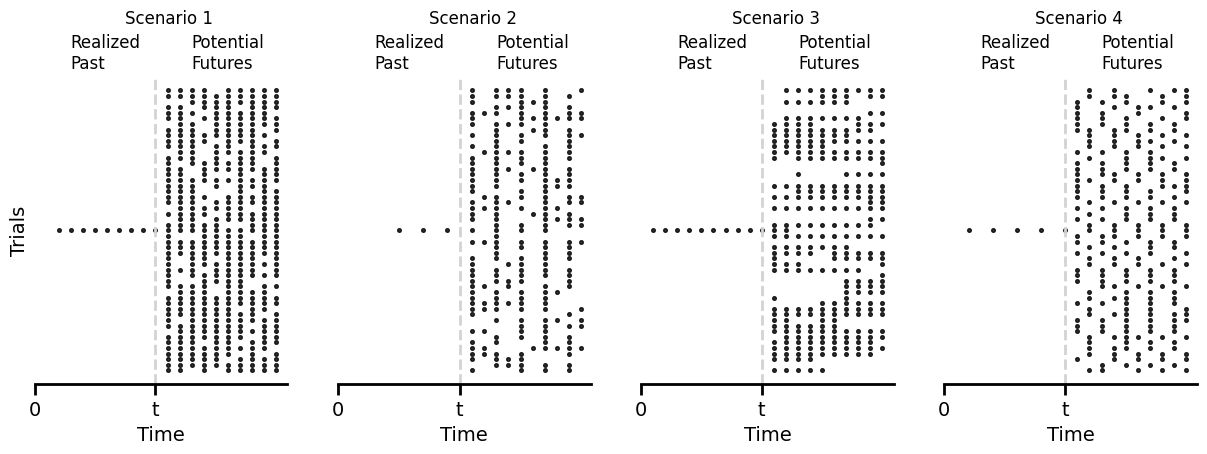

In [74]:
np.random.seed(1996)

fig, ax = plt.subplots(1, 4 ,figsize=(15, 4))
fontsize = 14
marker_size = 7
p = 0.8
q = 0.2
T = 20
T_initial = 10
T_end = 20
reps_1 = 51

reps_2 = 100
initial_show = int(reps_1/2)

## Senario 1
outcomes = np.random.binomial(1, p, size=(reps_1 , T_end))
outcomes[:initial_show,:T_initial] = np.zeros((initial_show,T_initial))
outcomes[initial_show+1:,:T_initial] = np.zeros((reps_1-1-initial_show,T_initial))
t_list = np.arange(1, T+1, 1)
outcomes = outcomes.astype(float)
# print(outcomes[:,:T_initial].shape)
outcomes[outcomes==0] = np.nan
for rep in range(reps_1):
    y = (outcomes[rep,:]+rep) * outcomes[rep,:]
    # print(y)
    if rep != initial_show:
        y[:T_initial] = np.nan
    ax[0].scatter(t_list,y, c = 'black',alpha = 0.8,s = marker_size)
# ax[0].set_title('Scenario 1',fontsize = fontsize)

### Senario 2
pattern = np.array([True, False]*T_end)[:T_end]

# sample a bunch of sequences from the process
p_pattern = np.zeros(T_end)
p_pattern[pattern] = p
p_pattern[~pattern] = q
outcomes = np.random.binomial(1, p_pattern, size=(reps_1, T_end))
outcomes[:initial_show,:T_initial] = np.zeros((initial_show,T_initial))
outcomes[initial_show+1:,:T_initial] = np.zeros((reps_1-1-initial_show,T_initial))
# outcomes = np.random.binomial(1, p, size=(reps_2 , T_end))
outcomes = outcomes.astype(float)
outcomes[outcomes==0] = np.nan
# print(outcomes)
t_list = np.arange(1, T+1, 1)
for rep in range(reps_1):
    y = (outcomes[rep,:]+rep) * outcomes[rep,:]
    # print(y)
    if rep != initial_show:
        y[:T_initial] = np.nan
    ax[1].scatter(t_list,y, c = 'black',alpha = 0.8,s = marker_size)
# ax[1].set_title('Scenario 2',fontsize = fontsize)

### Senario 3
t_list = np.arange(1, T+1, 1)
outcomes = np.zeros((reps_1,T))
for i in range(reps_1):
    outcomes_i = Data_Scenario3().get_samples(t = 10)
    outcomes[i,:] = outcomes_i
outcomes[:initial_show,:T_initial] = np.zeros((initial_show,T_initial))
outcomes[initial_show+1:,:T_initial] = np.zeros((reps_1-1-initial_show,T_initial))
outcomes = outcomes.astype(float)
outcomes[outcomes==0] = np.nan
for rep in range(reps_1):
    y = (outcomes[rep,:]+rep) * outcomes[rep,:]
    # print(y)
    if rep != initial_show:
        y[:T_initial] = np.nan
    ax[2].scatter(t_list,y, c = 'black',alpha = 0.8,s = marker_size)
# ax[2].set_title('Scenario 3',fontsize = fontsize)

### Scenario 4
t_list = np.arange(1, T+1, 1)
outcomes = np.zeros((reps_1,T))
for i in range(reps_1):
    z, _, _ = get_data(20)
    outcomes_i = z
    outcomes[i,:] = outcomes_i
outcomes[:initial_show,:T_initial] = np.zeros((initial_show,T_initial))
outcomes[initial_show+1:,:T_initial] = np.zeros((reps_1-1-initial_show,T_initial))
outcomes = outcomes.astype(float)
outcomes[outcomes==0] = np.nan
for rep in range(reps_1):
    y = (outcomes[rep,:]+rep) * outcomes[rep,:]
    # print(y)
    if rep != initial_show:
        y[:T_initial] = np.nan
    ax[3].scatter(t_list,y, c = 'black',alpha = 0.8,s = marker_size)
# ax[3].set_title('Scenario 4',fontsize = fontsize)


for i in range(4):
    ax[i].set_yticks([])
    ax[i].set_xticks([0,10],[0,'t'])
    ax[i].set_xlabel('Time',fontsize = fontsize)

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_linewidth(2)

    ax[i].tick_params(axis='x', labelsize=fontsize, length=8, width=2)

    ax[i].axvline(x=10, color='#D3D3D3', linestyle='--', linewidth=2)

    ax[i].text(3, 55, 'Realized\nPast', fontsize=12)
    ax[i].text(13, 55, 'Potential\nFutures', fontsize=12)
    ax[i].text(7.5, 63, f'Scenario {i+1}', fontsize=12)

    if i ==0:
        ax[i].set_ylabel('Trials',fontsize = fontsize)
    else:
        ax[i].set_ylabel('')

plt.savefig("../figures/rastergram.pdf", format="pdf", bbox_inches="tight") 